In [96]:
import pandas as pd
import numpy as np
temp_data = pd.read_excel("./data.xlsx")
temp_data = temp_data[['title','label']]
temp_data = temp_data.sort_values(['label'])
temp_data = temp_data[-2400:]
temp_data

,title,label
1514,한국조선해양 900억 원 규모 PC선 2척 수주,0
1477,한국조선해양 제46기 정기 주주총회 열어,0
1479,한국조선해양 전일대비 803 상승 이 시각 121만1051주 거래,0
1480,한국조선해양 전일대비 51 상승 이 시각 17만8300주 거래,0
1481,한국조선해양 장시작 후 꾸준히 올라 55 이 시각 거래량 44만2051주,0
...,...,...
716,국민연금 횡령·배임 기업에 이사 해임 주주권 행사한다,1
4038,포스코 수사 용두사미정준양 전 회장 불구속 기소,1
717,국민의 기업 실직·폐업 도시민을 위한 농업 일자리 연계 귀농교육 프로그,1
3983,포스코 협력업체 코스틸 회장 28일 검찰 소환조사,1


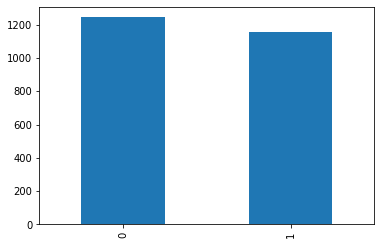

In [97]:
import matplotlib.pyplot as plt

temp_data['label'].value_counts().plot(kind='bar')

In [98]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

dataset = temp_data[temp_data.index%1==0]
#print(dataset)
import konlpy
from konlpy.tag import Okt
okt = Okt()

X=[]
for sentence in dataset['title']: 
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X.append(temp_X)

Y=[]
for i in dataset['label']:
    if i==0:
        Y.append(0)
    else:
        Y.append(1)
#print(X, Y)
max_len = max([len(s) for s in X])


In [99]:
word2index={} # dictionary for indexing
for sentence in X:
    for word in sentence:
        if word2index.get(word)==None:
            word2index[word]=len(word2index)
vocab_size = len(word2index)
print(word2index)

{'한국': 0, '조선해': 1, '양': 2, '900억': 3, '원': 4, '규모': 5, 'PC': 6, '선': 7, '2': 8, '척': 9, '수주': 10, '제': 11, '46': 12, '기': 13, '정기': 14, '주주총회': 15, '열다': 16, '전일': 17, '대비': 18, '803': 19, '상승': 20, '시각': 21, '121만': 22, '1051': 23, '주': 24, '거래': 25, '51': 26, '17만': 27, '8300': 28, '장': 29, '시작': 30, '후': 31, '꾸준하다': 32, '오르다': 33, '55': 34, '량': 35, '44만': 36, '2051': 37, '日': 38, '현대': 39, '重': 40, '대우조선': 41, '기업': 42, '결합': 43, '심사': 44, '신청': 45, '유럽연합': 46, '7월': 47, '종결': 48, '예상': 49, '”': 50, '유럽': 51, '선사': 52, '5만': 53, '톤급': 54, '900억원': 55, '유런선사': 56, '울': 57, '산시': 58, '400억': 59, '정원': 60, '’': 61, '기부': 62, '영업': 63, '익': 64, '1217억': 65, '지난해': 66, '동기': 67, '보다': 68, '251': 69, '뛰다': 70, '박다': 71, '이익': 72, '급증': 73, '그래도': 74, '불안하다': 75, '까닭': 76, '개최': 77, '카타르': 78, '100': 79, '발주': 80, '최대': 81, '수혜': 82, '주하이': 83, '투자': 84, '증권': 85, '9000억원': 86, '계약': 87, '1분': 88, '매출': 89, '3조': 90, '9천억원': 91, '흑자': 92, '달성': 93, '9446억': 94, '전년比': 95, '20': 96, '↑': 

In [100]:
# word -> vector
X_token = []
for sentence in X:
    temp_word = []    
    for word in sentence:
        temp_word.append(word2index[word])
    X_token.append(temp_word)
print(X_token)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [0, 1, 2, 11, 12, 13, 14, 15, 16], [0, 1, 2, 17, 18, 19, 20, 21, 22, 23, 24, 25], [0, 1, 2, 17, 18, 26, 20, 21, 27, 28, 24, 25], [0, 1, 2, 29, 30, 31, 32, 33, 34, 21, 25, 35, 36, 37, 24], [0, 1, 2, 38, 39, 40, 41, 42, 43, 44, 45], [0, 1, 2, 46, 42, 43, 44, 47, 48, 49, 50], [0, 1, 2, 51, 52, 53, 54, 6, 7, 8, 9, 55, 10], [0, 1, 2, 56, 53, 54, 6, 7, 8, 9, 55, 10], [0, 1, 2, 57, 58, 59, 60, 61, 62], [0, 1, 2, 63, 64, 65, 66, 67, 68, 69, 70, 71], [0, 1, 2, 63, 72, 73, 74, 75, 76], [0, 1, 2, 11, 12, 13, 14, 15, 77], [0, 1, 2, 78, 79, 9, 80, 81, 82, 83, 84, 85], [0, 1, 2, 3, 5, 53, 54, 6, 7, 8, 9, 10], [0, 1, 2, 86, 5, 6, 7, 8, 9, 10, 87], [0, 1, 2, 88, 13, 89, 90, 91, 92, 93], [0, 1, 2, 88, 13, 89, 90, 94, 95, 96, 97], [0, 1, 2, 88, 13, 89, 90, 98, 99, 63, 72, 100], [0, 1, 2, 88, 13, 89, 90, 94, 63, 64, 100], [0, 1, 2, 101, 102, 63, 64, 65, 95, 103, 97], [0, 1, 2, 101, 102, 63, 64, 100, 104, 105, 106, 97, 92, 107, 108], [0, 1, 2, 101, 102, 63, 64, 65, 109

In [101]:
# pad sequence & torch tensor
import torch
for token in X_token:
    if max_len > len(token):
        zero_pad = [0]*(max_len-len(token))
        token.extend(zero_pad)
X = torch.tensor(X_token)
print(X)

tensor([[   0,    1,    2,  ...,    0,    0,    0],
        [   0,    1,    2,  ...,    0,    0,    0],
        [   0,    1,    2,  ...,    0,    0,    0],
        ...,
        [3304,   42, 3202,  ...,    0,    0,    0],
        [ 364,  145,  373,  ...,    0,    0,    0],
        [4275, 2596, 4276,  ...,    0,    0,    0]])


In [102]:
Y = torch.tensor(Y)
Y

tensor([0, 0, 0,  ..., 1, 1, 1])

In [139]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size = 0.2, random_state=1)

from torch.autograd import Variable
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#X_train = torch.from_numpy(X_train).float().to(device)
#Y_train = torch.from_numpy(Y_train).long().to(device)
#print(Y_test)

# X_train = X_train.float().to(device)
# Y_train = Y_train.long().to(device)

# X_test = X_test.float().to(device)
# Y_test = Y_test.long().to(device)

# print(X_train.shape)
# print(Y_train.shape)

input_batch = Variable(torch.LongTensor(X_train))
target_batch = Variable(torch.LongTensor(Y_train))

X_test_batch = Variable(torch.LongTensor(X_test))
Y_test_batch = Variable(torch.LongTensor(Y_test))

In [140]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

dtype = torch.FloatTensor

# Bi-LSTM(Attention) Parameters
embedding_dim = 2
n_hidden = 5 # number of hidden units in one cell
num_classes = 2  # 0 or 1

# train = TensorDataset(X_train,Y_train)
# train_loader = DataLoader(train, batch_size=100, shuffle=True)

class BiLSTM_Attention(nn.Module):
    def __init__(self):
        super(BiLSTM_Attention, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, n_hidden, bidirectional=True)
        self.out = nn.Linear(n_hidden * 2, num_classes)

    # lstm_output : [batch_size, n_step, n_hidden * num_directions(=2)], F matrix
    def attention_net(self, lstm_output, final_state):
        hidden = final_state.view(-1, n_hidden * 2, 1)   # hidden : [batch_size, n_hidden * num_directions(=2), 1(=n_layer)]
        attn_weights = torch.bmm(lstm_output, hidden).squeeze(2) # attn_weights : [batch_size, n_step]
        soft_attn_weights = F.softmax(attn_weights, 1)
        # [batch_size, n_hidden * num_directions(=2), n_step] * [batch_size, n_step, 1] = [batch_size, n_hidden * num_directions(=2), 1]
        context = torch.bmm(lstm_output.transpose(1, 2), soft_attn_weights.unsqueeze(2)).squeeze(2)
        return context, soft_attn_weights.data.numpy() # context : [batch_size, n_hidden * num_directions(=2)]

    def forward(self, X):
        input = self.embedding(X) # input : [batch_size, len_seq, embedding_dim]
        input = input.permute(1, 0, 2) # input : [len_seq, batch_size, embedding_dim]

        hidden_state = Variable(torch.zeros(1*2, len(X), n_hidden)) # [num_layers(=1) * num_directions(=2), batch_size, n_hidden]
        cell_state = Variable(torch.zeros(1*2, len(X), n_hidden)) # [num_layers(=1) * num_directions(=2), batch_size, n_hidden]

        # final_hidden_state, final_cell_state : [num_layers(=1) * num_directions(=2), batch_size, n_hidden]
        output, (final_hidden_state, final_cell_state) = self.lstm(input, (hidden_state, cell_state))
        output = output.permute(1, 0, 2) # output : [batch_size, len_seq, n_hidden]
        attn_output, attention = self.attention_net(output, final_hidden_state)
        return self.out(attn_output), attention # model : [batch_size, num_classes], attention : [batch_size, n_step]

In [143]:
model = BiLSTM_Attention()
#model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
for epoch in range(5000):
    total_loss = 0 
    optimizer.zero_grad()
    output, attention = model(input_batch)
    loss = criterion(output, target_batch)

    if (epoch + 1) % 1000 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))
    loss.backward()
    optimizer.step()

Epoch: 1000 cost = 0.018888
Epoch: 2000 cost = 0.002202
Epoch: 3000 cost = 0.000373
Epoch: 4000 cost = 0.000168
Epoch: 5000 cost = 0.000089


In [148]:
# Predict
result, _ = model(X_test_batch)
result = result.data.max(1, keepdim=True)[1]
print(result[:10])
print(Y_test_batch[:10])

tensor([[1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1]])
tensor([1, 0, 1, 1, 0, 0, 0, 0, 0, 1])


In [165]:
results = []
for re in result:
    results.append(int(re[0]))
results = torch.tensor(results)
print(results)

tensor([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
        0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,

In [164]:
Y_test_batch

tensor([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
        0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,

In [166]:
accuracy = sum(Y_test_batch.cpu().data.numpy() == results.cpu().numpy()) / len(Y_test_batch.cpu().data.numpy())
accuracy

0.86875